In [92]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [93]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [94]:
X_test.shape

(10000, 28, 28)

In [95]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

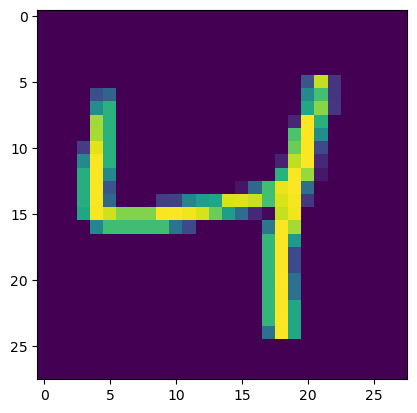

In [96]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [97]:
X_train = X_train/255
X_test = X_test/255

In [98]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [99]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [102]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2762 - accuracy: 0.9209 - val_loss: 0.1431 - val_accuracy: 0.9574
Epoch 2/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1203 - accuracy: 0.9643 - val_loss: 0.1065 - val_accuracy: 0.9675
Epoch 3/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0820 - accuracy: 0.9756 - val_loss: 0.0891 - val_accuracy: 0.9730
Epoch 4/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.1025 - val_accuracy: 0.9694
Epoch 5/25
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0916 - val_accuracy: 0.9735
Epoch 6/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0972 - val_accuracy: 0.9731
Epoch 7/25
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0889 - val_

In [103]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [104]:
y_pred = y_prob.argmax(axis=1)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9758

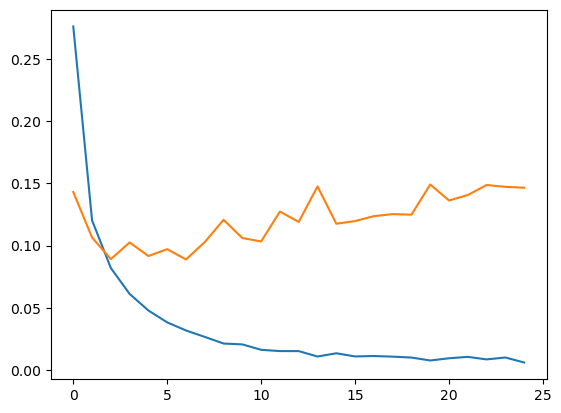

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

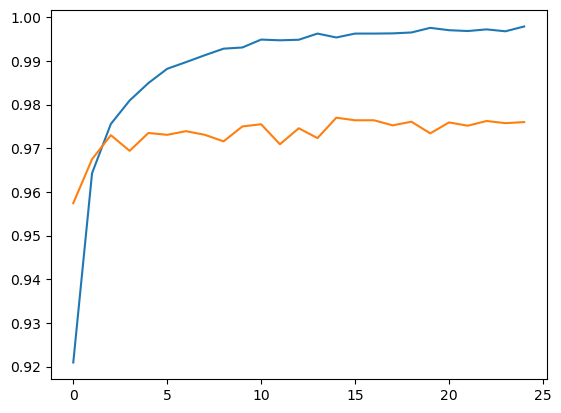

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

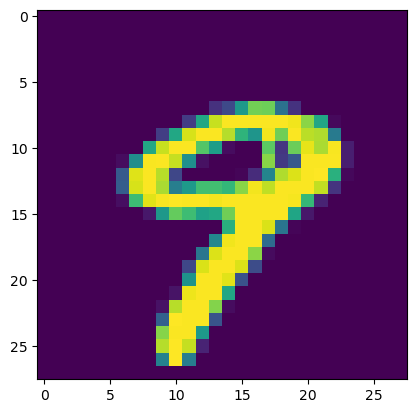

In [108]:
plt.imshow(X_test[9])

In [110]:
model.predict(X_test[9].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 38ms/step


array([9])